<a href="https://colab.research.google.com/github/zerryberry/C1/blob/master/SLR_In_Class_Lab_Exercise_(Day_1)_Questions_%5Bv3_0_161020%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [107]:
df= pd.read_csv('/content/FEV_data.csv')
df1= pd.read_csv('/content/Life_Expectancy.csv')
print(df.shape)
print(df1.shape)

(654, 5)
(124, 18)


In [108]:
df1.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [109]:
df1.iloc[:, 2:]

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,37,24,95,129,15.4,38,95,95,7.1,287.931877,8991735,6.8,7.0,0.388,8.8,55.3
120,397,26,89,386,14.9,42,89,89,7.7,236.911438,8818438,6.9,7.1,0.371,8.2,53.4
121,48,29,96,1064,14.5,46,96,96,8.1,212.661949,868346,7.0,7.3,0.359,7.6,52.0
122,415,31,88,2738,14.1,50,85,88,8.0,196.597780,853625,7.2,7.4,0.343,7.2,57.0


In [110]:
['Hepatitis', 'Measles', 'Polio', 'Diphtheria']

['Hepatitis', 'Measles', 'Polio', 'Diphtheria']

In [111]:
df1.columns = [i.strip() for i in df1.columns]

### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

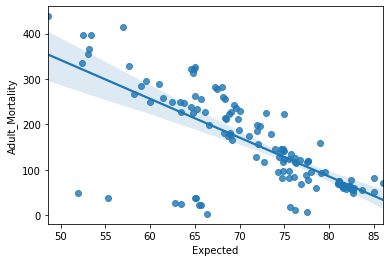

In [112]:
sns.regplot(y=df1['Adult_Mortality'], x= df1['Expected'])
plt.show()

From the reg plot, we can see a trend that as the Adult mortality decreases, expected lifespan increases. There is a negative correlation between them.

In [113]:
df1.set_index('Country', inplace=True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [114]:
import statsmodels.api as sm
xc= sm.add_constant(df1['Income_Index'])
model = sm.OLS(df1['Expected'], xc).fit()
y_pred= model.predict(xc)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           1.13e-34
Time:                        02:38:39   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081   

In [115]:
model.resid.mean()

2.5957730588655274e-14

In [116]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=df1['Expected'], y_pred = y_pred)

20.561167769791123

<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [117]:
df1.head()

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
Country,,,,,,,,,,,,,,,,,
Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [118]:
xc= sm.add_constant(df1[['Hepatitis', 'Polio', 'Diphtheria']])
model = sm.OLS(df1['Expected'], xc).fit()
y_pred1= model.predict(xc)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           0.000468
Time:                        02:38:39   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.9881      3.524     16.453      0.0

In [119]:
# P values of  Polio is lesser than the critical value- so only that feature is significant in prediction of expected life.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [120]:
df1['Developing'] = pd.get_dummies(df1['Status'], drop_first=True)

In [121]:
xc= sm.add_constant(df1[['Hepatitis', 'Measles', 'Polio', 'Diphtheria', 'Developing']])
model = sm.OLS(df1['Expected'], xc).fit()
y_pred1= model.predict(xc)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     11.27
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           6.73e-09
Time:                        02:38:39   Log-Likelihood:                -416.14
No. Observations:                 124   AIC:                             844.3
Df Residuals:                     118   BIC:                             861.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.0536      3.800     18.436      0.0

Yes, Indeed after adding the developing index- (categorical variable) our R2 and adjusted R2 indeed improved. 

AIC and BIC reduced

F statistics increased. 

Residuals are normally distributed

Also, autocorrelation increased between the residuals- not a great sign

In [122]:
# MSE

mean_squared_error(y_true = df1['Expected'], y_pred = y_pred1)

48.13438590476449

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [131]:
dftr = df1.iloc[:, 2:]
dftr.drop({'Expected'}, axis=1, inplace= True)
dftr.head()

,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Developing,Status_Developing
Country,,,,,,,,,,,,,,,
Afghanistan,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,1,1
Albania,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,1,1
Algeria,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,1,1
Angola,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,1,1
Argentina,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,1,1


In [124]:
xc= sm.add_constant(dftr)
model = sm.OLS(df1['Expected'], xc).fit()
y_pred2= model.predict(xc)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     29.28
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           3.26e-31
Time:                        02:38:40   Log-Likelihood:                -339.74
No. Observations:                 124   AIC:                             711.5
Df Residuals:                     108   BIC:                             756.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                54.7805      4.12

In [125]:
[(i,j) for i,j in zip(model.pvalues.index, model.pvalues.values) if j<= 0.05]

[('const', 1.846605121365219e-24),
 ('HIV', 1.034477197709049e-05),
 ('Population', 0.007469564065173645),
 ('Income_Index', 0.0019428583564485612),
 ('Developing', 0.032738122826220524)]

In [126]:
# the above mentioned features are significantly contributing to the target prediction

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [128]:
# RMSE
from sklearn.metrics import mean_absolute_error

xc= sm.add_constant(dftr['Income_Index'])
model = sm.OLS(df1['Expected'], xc).fit()
y_pred3= model.predict(xc)
print(mean_absolute_error(y_true= df1['Expected'], y_pred=y_pred3))

3.384313725730104


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [129]:
xc= sm.add_constant(dftr['Income_Index'])
model = sm.OLS(df1['Expected'], xc).fit()
y_pred3= model.predict(xc)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           1.13e-34
Time:                        02:39:11   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081   

In [ ]:
# Lowest bound:

37.576 

# Upper bound:

47.273

<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [130]:
df1 = pd.get_dummies(columns=['Status'], data=df1, drop_first=True)

In [ ]:
df1.head()

In [ ]:
df1['gdp_inter'] = df1['GDP']* df1['Status_Developing']

In [ ]:
# Lets do a population t test on life expectancy:

xc= sm.add_constant(df1[['Adult_Mortality','Population']])
model = sm.OLS(df1['Expected'], xc).fit()
y_pred4= model.predict(xc)
print(model.summary())

In [ ]:
# seems like population has no significant value to contribute to expected life .

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
xc= sm.add_constant(dftr)
model = sm.OLS(df1['Expected'], xc).fit()
y_pred4= model.predict(xc)
print(model.summary())

In [ ]:
df1

In [ ]:
# Our overall model significance is given by p value of F score- which here is very less- So our model is a good model. 

# even R2 adjusted is higher. 



<a id="assum"> </a>
## 5. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# QQ plot.

stats.probplot(model.resid, plot=plt)
plt.show()

In [ ]:
# JB test

stats.jarque_bera(model.resid)

In [ ]:
# it is NOT normally distributed as shown by a JB test

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
xc= sm.add_constant(df1['gdp_inter'])
model = sm.OLS(df1['Expected'], xc).fit()
print(model.summary())

The interaction brings out an interesting feature- also significant- but the model'score isnt vastly determined by this feature alone. 

Maybe along with other features, this works better

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
[vif(xc.values, i) for i in range(xc.shape[1])]

In [ ]:
xc.columns

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df1.head()

In [133]:
xc= sm.add_constant(dftr)
model = sm.OLS(df1['Expected'], dftr).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1073.
Date:                Fri, 29 Jan 2021   Prob (F-statistic):                   1.27e-110
Time:                        02:40:33   Log-Likelihood:                         -400.46
No. Observations:                 124   AIC:                                      828.9
Df Residuals:                     110   BIC:                                      868.4
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

The adjusted R2 and R2 has reached almost 99%. But our coeff wont make much sense without the intercept. 

### Now we shall consider the FEV dataset.

### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in youths and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height (cm):** Height (cm) in cm 

**Sex:** Gender of a person

**Smoke_habits** Whether the person is a smoker or non- smoker

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [136]:
df.head()

,Age,Height (cm),FEV,Sex_M,Smoke_habit_smoker
0,16,157.0,1.708,0,1
1,17,167.5,1.724,0,1
2,19,154.5,1.720,0,1
3,16,163.0,1.558,1,1
4,16,157.0,1.895,1,1


In [135]:
df = pd.get_dummies(columns=['Sex', 'Smoke_habit'], data=df, drop_first=True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Identify the numeric variable(s) that have highest impact on the FEV of a person</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [137]:
xc= sm.add_constant(df.loc[:, df.columns!='FEV'])
model = sm.OLS(df['FEV'], xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     379.5
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          2.78e-168
Time:                        02:52:23   Log-Likelihood:                -439.94
No. Observations:                 654   AIC:                             889.9
Df Residuals:                     649   BIC:                             912.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.5268      0

In [142]:
xc= sm.add_constant(df['Smoke_habit_smoker'])
model = sm.OLS(df['FEV'], xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     70.92
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           2.36e-16
Time:                        02:54:37   Log-Likelihood:                -800.43
No. Observations:                 654   AIC:                             1605.
Df Residuals:                     652   BIC:                             1614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4206      0

In [143]:
# We can say with fair conficence that smoking habit is the single most contributing factor while predicting FEV of a person

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. What is the impact of smoking habit of a person on FEV?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# reducing the FEV by -0.8778

# P value = almost close to 0

xc= sm.add_constant(df['Smoke_habit_smoker'])
model = sm.OLS(df['FEV'], xc).fit()
print(model.summary())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether there is multicollinearity present or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [144]:
# We can do a VIF test. 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

dt= df.iloc[:,df.columns!='FEV']
gt= pd.DataFrame()
gt['vars'] = dt.columns
gt['vif_score'] = [vif(dt.values, i) for i in range(dt.shape[1])]

In [145]:
gt

,vars,vif_score
0,Age,46.847628
1,Height (cm),53.368643
2,Sex_M,2.079638
3,Smoke_habit_smoker,8.760185


In [ ]:
# Yes Age and height are - obviously - has a strong covariance. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [148]:
# DW statistics

xc= sm.add_constant(df.loc[:, df.columns!='FEV'])
model = sm.OLS(df['FEV'], xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     379.5
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          2.78e-168
Time:                        03:12:03   Log-Likelihood:                -439.94
No. Observations:                 654   AIC:                             889.9
Df Residuals:                     649   BIC:                             912.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.5268      0

In [147]:
# We are getting a DW test as 1.6 - which is not that great. 

# Residuals (errors) have some what autocorrelation between them.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

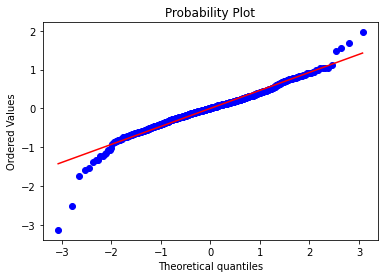

In [149]:
# QQ PLot

stats.probplot(model.resid, plot=plt)
plt.show()

In [150]:
# H0 = Residuals are normally distributed

stats.jarque_bera(model.resid)

(652.3925077349464, 0.0)

In [151]:
# We reject the null hypothesis. 

# They are NOT normally distributed.

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a full model on 70% of the given data. Calculate the mean square error and the root mean square error on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [152]:
from sklearn.model_selection import train_test_split

In [156]:
x_tr, x_ts, y_tr, y_ts = train_test_split(df.loc[:, df.columns != 'FEV'], df['FEV'], random_state= 42)

In [157]:
xc= sm.add_constant(x_tr)
model = sm.OLS(y_tr, xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     257.7
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          1.63e-118
Time:                        03:20:16   Log-Likelihood:                -338.23
No. Observations:                 490   AIC:                             686.5
Df Residuals:                     485   BIC:                             707.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.0415      0

In [165]:
# predict and score

xy = sm.add_constant(x_ts)
rr= model.predict(xy)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true= y_ts, y_pred=rr)

0.20555047934139767

In [166]:
#rmse
np.sqrt(mean_squared_error(y_true= y_ts, y_pred=rr))

0.4533767520963086

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error for the test set using the model in Q18. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [167]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true= y_ts, y_pred=rr)

0.3403189727932396

In [173]:
# MAPE

sum(abs(y_ts - rr/ y_ts))/len(y_ts)

1.7308759975167594

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build the full model on 80% of the given data and check if the model is overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [174]:
x_tr1, x_ts1, y_tr1, y_ts1 = train_test_split(df.loc[:, df.columns != 'FEV'], df['FEV'], train_size=0.8,  random_state= 42)

In [175]:
xc= sm.add_constant(x_tr1)
model = sm.OLS(y_tr1, xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     277.6
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          2.64e-127
Time:                        03:39:10   Log-Likelihood:                -361.18
No. Observations:                 523   AIC:                             732.4
Df Residuals:                     518   BIC:                             753.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.1589      0

In [176]:
# predict and score

xyz = sm.add_constant(x_ts1)
rrt= model.predict(xyz)
from sklearn.metrics import r2_score

print(mean_squared_error(y_true= y_ts1, y_pred=rrt))
print(r2_score(y_true= y_ts1, y_pred=rrt))


0.19547437339689877
0.7609939828819209


In [177]:
# training score is less

# testing score is less too- so the model is kind of Underfitting